In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import seaborn as sn

Импортируем библиотеки **pandas,seaborn, matlplotlib** - для визуализации данных двумерной графикой.

In [2]:
train_df = pd.read_csv('titanic_data/train.csv')
test_df = pd.read_csv('titanic_data/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Описание строк
1. **PassengerId** - Порядковый номер закрепленый за пассажиром.
2. **Survived** - Отображенме выживших, где 1 - это выжил, а 0 - нет.
3.**Pclass** - Класс билета.
4. **Name** - Имя пассажира.
5. **Sex** - Пол пассажира.
6. **Age** - Возраст пассажира.
7. **SibSp** - Братьев и сестер / супругов на борту.
8. **Parch** - Родителей/детей на борту.
9. **Ticket** - Номер билета.
10. **Fare** - Цена билета.
11. **Cabin** - Номер каюты.
12. **Embarked** - Порт погрузки, где С=Шербур Q=Куинстаун и S=Саутгемптон.

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


Сделав группировку числовых значений по колонке **Survived** и выведя среднее значение, можно заметить что больше всего выживших было среди богатых людей, так как больше всего выжило людей у которых билет стоил в два раза больше чем у погибших и класс их кают был в большей степени первым.

In [6]:
train_df.groupby(train_df['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


С помощью метода **isnull()** сгруппировали возраст пассажиров и проверили его на отсутствие данных. Получили что пассажиры без записи возраста имели меньше шансов выжить и их билет стоил на порядок меньше чем у пассажиров с информацией о возрасте. 

# Построим графики сотношения выживших к классу, братьев/систер, родителей/детей.

<Figure size 432x288 with 0 Axes>

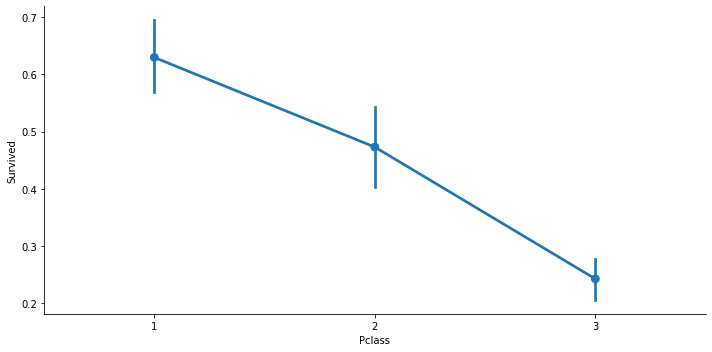

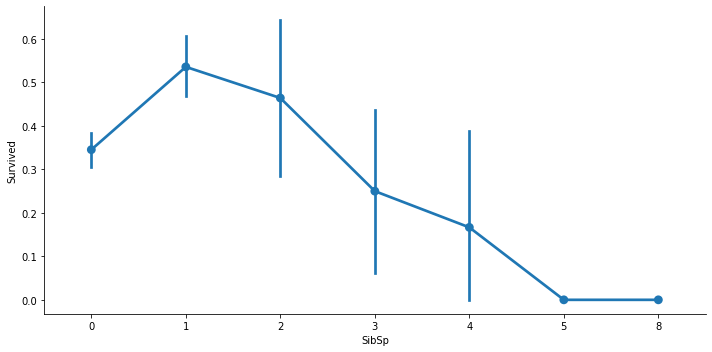

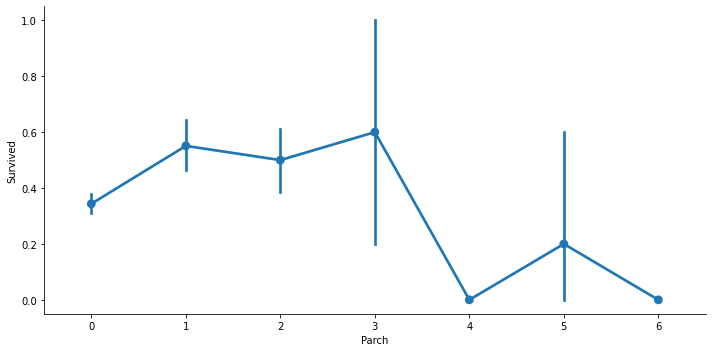

In [7]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
  pl.figure(i)
  sn.catplot(x=col, y='Survived', data=train_df, kind='point', aspect=2)

1. Как видно на первом графике больше всего выжило пассажиров первого класса чем пассажиров второго и третьего.
2. На втором графике видно что процент выживших пасссажиров был больше у кого было меньше братьев или систер.
3. Третий график показывает что выжило больше пасажиров у которых было меньше дитей.

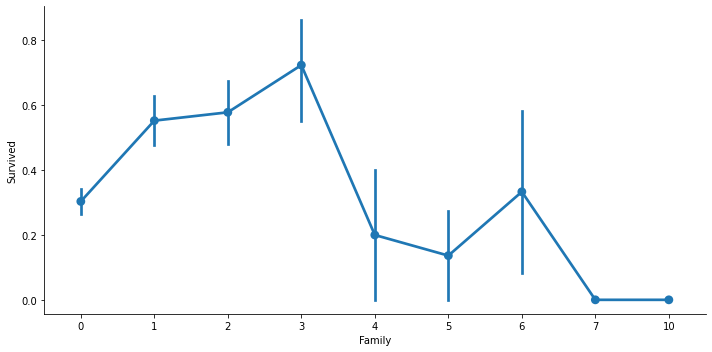

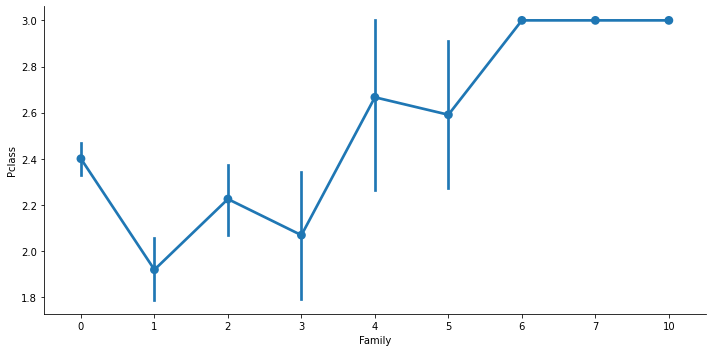

In [8]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
sn.catplot(x='Family', y='Survived', data=train_df, kind='point', aspect=2)
sn.catplot(x='Family', y='Pclass', data=train_df, kind='point', aspect=2)

Объединим колонки **SibSp** и **Parch** в единую колонку **Family** и выведем график. На первом графике видно, что процент выживания был больше у семей с меньшим количеством членов семьи. На втором графике видим что семьи с большим количеством членов семьи не могли позволить себе приобрести более дорогой класс. Делая вывод на составленных графиках и сделанных раньше выводах можно заключить что в первую очередь спасали пассажиров более дорогих классов т.е. имеет место классовое неравенство.

#Удалим из нашего датафрейма вещественные признаки для работы только с катигориальными признаками.

In [9]:
cont_features = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Family']
train_df.drop(cont_features, axis=1, inplace=True)
train_df.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


Вывели информацию о наше датасете при помощи функции **info**. После вывода видно, что колонки **Cabin** и **Embarked** содержат пустые значения.
Проверим имеет ли значение отсутствующих данных о каюте к выживанию.

In [11]:
train_df.groupby(train_df['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


После сравнения видно, что те пассажиры у которых отсутствовала запись о каюте имели шанс на выживание всего **30%** в то время как пассажиры с присутствующей записью имели шанс в **67%** процентов.

In [12]:
train_df['Cabin_avail'] = np.where(train_df['Cabin'].isnull(), 0, 1)
train_df.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_avail
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


Создаем колонку с классификатором который отображает есть ли пассажира каюта при помощи метода **np.where()** который проверяет поле в колонке **Cabin** на определенное условие.

<Figure size 432x288 with 0 Axes>

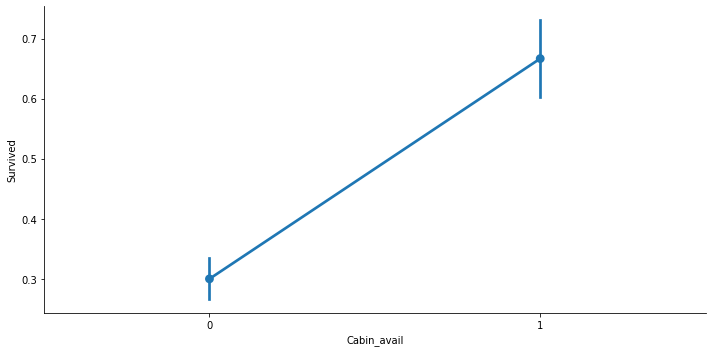

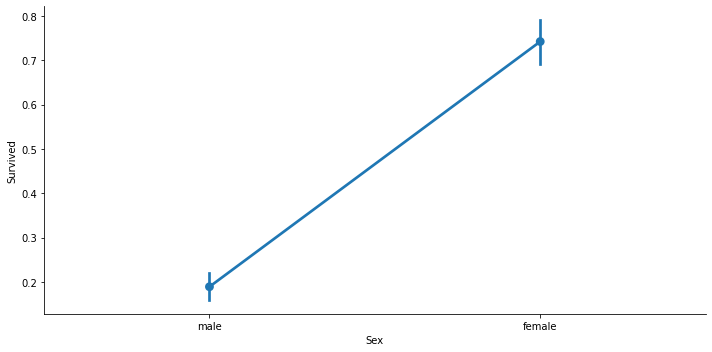

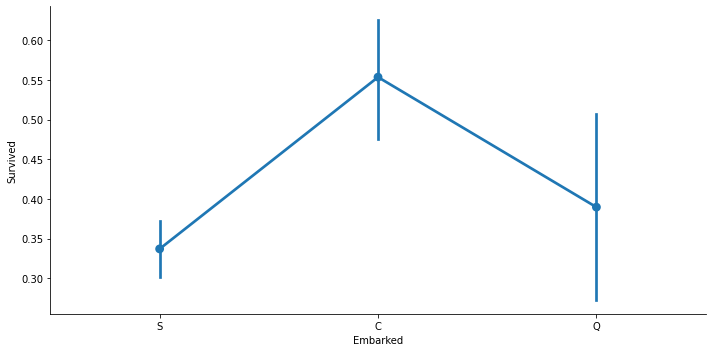

In [13]:
for i, col in enumerate(['Cabin_avail', 'Sex', 'Embarked']):
  pl.figure(i)
  sn.catplot(x=col, y='Survived', data=train_df, kind='point', aspect=2)

1. Первый график показывает что выживание зависло от информации наличия о каюте пассажира.
2. Второй график показывает что выжило больше всего женщин.
3. Третий график показывает процент выживания относительно порта, где совершалась посадка на борт.

In [14]:
train_df.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


Преобразовав **train_df** в сводную таблицу при помощи функции **pivot_table()** получили таблицу покусывающею количество пассажиров, относительно пола, которое взошло на борт корабля на каком порту.
Из этой таблицы можно понять почему на третьем графике больше всего погибших было в Саутгемптоне так как там на борт взошло больше всего мужчин. 

In [15]:
train_df.pivot_table('Survived', index='Cabin_avail', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_avail,,,
0,99,73,515
1,69,4,129


Преобразовав **train_df** в сводную таблицу при помощи функции **pivot_table()** получили таблицу показывающую информацию о каютах относительно пассажиров и места их подъема на борт корабля. Из этой таблицы можно сделать вывод, что больше всего выживших было в Шербуре так как от туда было больше всего пассажиров с информацией об их каюте.